# Import

In [1]:
# Import các thư viện cần thiết
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display
from pathlib import Path

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.4f' % x)
sns.set_style("whitegrid")


# Load Data

In [2]:
data_dir = Path('../../data/raw/fa')
if not data_dir.exists():
    print('Data directory not found:', data_dir.resolve())
else:
    csv_files = sorted(data_dir.glob('*.csv'))
    print(f'Found {len(csv_files)} CSV file(s)')
    dfs = {}
    for f in csv_files:
        try:
            df = pd.read_csv(f)
            dfs[f.stem] = df
            print(f'Loaded {f.name}')
        except Exception as e:
            print(f'Failed to load {f.name}:', e)


Found 3 CSV file(s)
Loaded bangcandoiketoan.csv
Loaded bangluuchuyentiente.csv
Loaded baocaotaichinh.csv


# I. Tìm hiểu Dữ liệu

## 1. Mô tả Dữ liệu

In [3]:
print("Cấu trúc tổng quan của dữ liệu:")
for name, df in dfs.items():
	print(f'\nDataFrame: {name}')
	print(f'Shape: {df.shape}')
	df.info()
	display(df.head())


Cấu trúc tổng quan của dữ liệu:

DataFrame: bangcandoiketoan
Shape: (12431, 76)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12431 entries, 0 to 12430
Data columns (total 76 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   CP                                                           12431 non-null  object 
 1   Năm                                                          12431 non-null  int64  
 2   Kỳ                                                           12431 non-null  int64  
 3   TÀI SẢN NGẮN HẠN (đồng)                                      12112 non-null  float64
 4   Tiền và tương đương tiền (đồng)                              12431 non-null  int64  
 5   Giá trị thuần đầu tư ngắn hạn (đồng)                         11283 non-null  float64
 6   Các khoản phải thu ngắn hạn (đồng)                           12112 non-null  float64
 

,CP,Năm,Kỳ,TÀI SẢN NGẮN HẠN (đồng),Tiền và tương đương tiền (đồng),Giá trị thuần đầu tư ngắn hạn (đồng),Các khoản phải thu ngắn hạn (đồng),Hàng tồn kho ròng,Tài sản lưu động khác,TÀI SẢN DÀI HẠN (đồng),...,Vốn của tổ chức tín dụng,Quỹ của tổ chức tín dụng,Chênh lệch tỷ giá hối đoái,Lợi thế thương mại,Vốn Ngân sách nhà nước và quỹ khác,_Các quỹ khác,Cổ đông thiểu số,Đầu tư vào công ty con,Tài sản cố định thuê tài chính,Chênh lệch đánh giá lại tài sản
0,AAA,2025,3,4377037083396.0000,1741373916584,186400000000.0000,1531251902335.0000,757283181389.0000,160728083088.0000,7864700594492.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAA,2025,2,4553020197155.0000,1706426051965,229407600000.0000,1475454681315.0000,987232373973.0000,154499489902.0000,7606507839458.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAA,2025,1,4793960251895.0000,2106077190958,166190744500.0000,1551510885796.0000,827536022226.0000,142645408415.0000,7390793127094.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAA,2024,4,6426369244563.0000,2419517905105,718639358712.0000,1801012289922.0000,1286443372106.0000,200756318718.0000,7341846339892.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAA,2024,3,6956714508528.0000,1945532019980,1346697394178.0000,2303218872955.0000,1138806271275.0000,222459950140.0000,6075525235098.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame: bangluuchuyentiente
Shape: (12327, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12327 entries, 0 to 12326
Data columns (total 47 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Mã CK                                                                12327 non-null  object 
 1   CP                                                                   12327 non-null  object 
 2   Năm                                                                  12327 non-null  int64  
 3   Kỳ                                                                   12327 non-null  int64  
 4   Lãi/Lỗ ròng trước thuế                                               9659 non-null   float64
 5   Khấu hao TSCĐ                                                        10924 non-null  float64
 6   Dự phòng RR tín dụng                               

,Mã CK,CP,Năm,Kỳ,Lãi/Lỗ ròng trước thuế,Khấu hao TSCĐ,Dự phòng RR tín dụng,Lãi/Lỗ chênh lệch tỷ giá chưa thực hiện,Lãi/Lỗ từ thanh lý tài sản cố định,Lãi/Lỗ từ hoạt động đầu tư,...,Ảnh hưởng của chênh lệch tỷ giá,Tiền và tương đương tiền cuối kỳ,Thu lãi và cổ tức,"Chi trả cho việc mua lại, trả cổ phiếu",_Tăng/Giảm các khoản phải thu,_Tăng/Giảm các khoản phải trả,(Lãi)/lỗ các hoạt động khác,Lưu chuyển tiền thuần từ HĐKD trước thuế,Chi từ các quỹ của TCTD,Cố tức đã nhận
0,AAA,AAA,2025,3,156177544852.0000,123479574529.0000,0.0000,21981270333.0000,0.0000,-32056061888.0000,...,-19968078425.0000,1741373916584.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAA,AAA,2025,2,211000328064.0000,124198168494.0000,-53351295.0000,-28939479859.0000,0.0000,-73102523029.0000,...,29123356683.0000,1706426051965.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAA,AAA,2025,1,68490244130.0000,131683853040.0000,-1012389278.0000,-822206533.0000,0.0000,83780280365.0000,...,-141596623.0000,2106077190958.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAA,AAA,2024,4,98315358351.0000,140838609929.0000,2503038058.0000,-8992148908.0000,0.0000,69567332283.0000,...,14947625918.0000,2419517905105.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAA,AAA,2024,3,-27915231028.0000,81806145599.0000,143380938.0000,21643938611.0000,0.0000,-28790374292.0000,...,-39294507141.0000,1945532019980.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame: baocaotaichinh
Shape: (12019, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12019 entries, 0 to 12018
Data columns (total 47 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   CP                                                12019 non-null  object 
 1   Năm                                               12019 non-null  int64  
 2   Kỳ                                                12019 non-null  int64  
 3   Tăng trưởng doanh thu (%)                         11990 non-null  float64
 4   Doanh thu (đồng)                                  12013 non-null  float64
 5   Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)  12019 non-null  int64  
 6   Tăng trưởng lợi nhuận (%)                         11996 non-null  float64
 7   Thu nhập tài chính                                11722 non-null  float64
 8   Chi phí tiền lãi vay                              

,CP,Năm,Kỳ,Tăng trưởng doanh thu (%),Doanh thu (đồng),Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng),Tăng trưởng lợi nhuận (%),Thu nhập tài chính,Chi phí tiền lãi vay,Doanh thu bán hàng và cung cấp dịch vụ,...,Chứng khoán đầu tư,Hoạt động khác,Chi phí hoạt động khác,Lãi/lỗ thuần từ hoạt động khác,Cố tức đã nhận,Tổng thu nhập hoạt động,LN từ HĐKD trước CF dự phòng,Chi phí dự phòng rủi ro tín dụng,Thuế TNDN,Lãi cơ bản trên cổ phiếu
0,AAA,2025,3,-0.2576,2371755171900.0000,117554438469,4.3925,27050269621.0000,-24230118284.0000,2371755171900.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAA,2025,2,-0.1699,2310908388011.0000,131689030063,-0.0309,73338932159.0000,-36639398614.0000,2310908388011.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAA,2025,1,0.3011,3857615161473.0000,45239813399,-0.6642,37647668844.0000,-37860213792.0000,3857615161473.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAA,2024,4,0.4305,3844069138022.0000,76186464918,-0.1875,91249831608.0000,-49789576625.0000,3844069138022.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAA,2024,3,-0.0953,3194720984754.0000,21799597923,-0.7799,33516838128.0000,-33905226424.0000,3194720984754.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dưới đây là tổng hợp phân tích về cấu trúc và đặc điểm của cả ba bộ dữ liệu bạn đã cung cấp: `bangcandoiketoan` (Bảng Cân đối Kế toán), `bangluuchuyentiente` (Báo cáo Lưu chuyển Tiền tệ), và `baocaotaichinh` (Báo cáo Kết quả Hoạt động Kinh doanh/Tổng hợp).

### 1. Tóm tắt Cấu trúc Chung

| DataFrame | Số lượng Bản ghi | Số lượng Cột | Mục đích chính | Độ Hoàn chỉnh Tổng thể |
| :--- | :--- | :--- | :--- | :--- |
| **Bảng Cân đối Kế toán** | 12.431 | 76 | Tài sản, Nợ phải trả, Vốn Chủ sở hữu tại một thời điểm. | Rất tốt cho các chỉ tiêu tổng hợp. |
| **Lưu chuyển Tiền tệ** | 12.327 | 47 | Dòng tiền ròng từ 3 hoạt động (Kinh doanh, Đầu tư, Tài chính) trong một kỳ. | Tốt cho các chỉ tiêu dòng tiền chính. |
| **Báo cáo Tài chính (KQKD)** | 12.019 | 47 | Kết quả hoạt động (Doanh thu, Chi phí, Lợi nhuận) trong một kỳ. | Tốt cho các chỉ tiêu lợi nhuận chính. |

**Nhận xét:** Cả ba bộ dữ liệu đều có **quy mô lớn** (hơn 12.000 bản ghi) và **giàu thuộc tính** (từ 47 đến 76 cột), cung cấp cái nhìn toàn diện về tài chính của các công ty trong nhiều kỳ.

### 2. Đặc điểm Quan trọng và Vấn đề Tiềm ẩn

Điểm chung lớn nhất và cần lưu ý nhất trong cả ba bộ dữ liệu là sự **kết hợp dữ liệu từ các loại hình doanh nghiệp khác nhau**, dẫn đến sự phân bố không đồng đều về độ hoàn chỉnh của các cột:

#### a) Độ Hoàn chỉnh Tuyệt vời (Dữ liệu Core)

Các chỉ tiêu **tổng hợp và cơ bản** của BCTC đều rất đầy đủ (Non-Null Count $\approx$ 12.000 - 12.431):
* **BCĐKT:** Tổng Tài sản, Nợ phải trả, Vốn chủ sở hữu.
* **LCTT:** Dòng tiền thuần từ HĐKD/Đầu tư/Tài chính, Tiền và tương đương tiền cuối kỳ.
* **BCKQKD:** Doanh thu thuần, Lãi gộp, Chi phí quản lý DN, Lợi nhuận trước/sau thuế.

Đây là nền tảng vững chắc để thực hiện các phân tích về quy mô, cấu trúc vốn, và khả năng sinh lời ở cấp độ cao.

#### b) Độ Hoàn chỉnh Thấp (Các chỉ tiêu Đặc thù)

Một số lượng lớn cột có số lượng Non-Null rất thấp, thường chỉ **dưới 500** bản ghi, cho thấy chúng chỉ áp dụng cho một tập hợp rất nhỏ các công ty:

* **Các chỉ tiêu Tài chính/Ngân hàng:** Xuất hiện trong cả ba bộ data (ví dụ: Chứng khoán kinh doanh, Tiền gửi tại NHNN Việt Nam, Thu nhập lãi thuần, Chi phí dự phòng rủi ro tín dụng, Chi từ các quỹ của TCTD).
    * **Ý nghĩa:** Tập dữ liệu này bao gồm cả **Tổ chức Tín dụng (TCTD)**. Các cột này là **dữ liệu cốt lõi** nếu bạn phân tích Ngân hàng nhưng gần như vô dụng (NaN) cho các công ty sản xuất/thương mại.
* **Các chỉ tiêu Kế toán Chi tiết/Ít phổ biến:** (Ví dụ: Lãi/Lỗ từ thanh lý tài sản cố định, Lợi thế thương mại, Đầu tư vào công ty con).
    * **Ý nghĩa:** Những hoạt động này không xảy ra thường xuyên hoặc không được báo cáo chi tiết theo chuẩn mực kế toán cho mọi công ty.

### 3. Đề xuất Xử lý Dữ liệu và Phân tích Tiếp theo

Để khai thác hiệu quả 3 bộ dữ liệu này, cần thực hiện các bước sau:

#### a) Phân tách (Segmentation) Dữ liệu
* **Bước quan trọng nhất:** Dựa vào các cột đặc thù (ví dụ: `Thu nhập lãi và các khoản tương tự` trong `baocaotaichinh`), **xác định và phân tách** nhóm công ty TCTD/Ngân hàng ra khỏi nhóm công ty thông thường.
* **Lợi ích:** Phân tích từng nhóm riêng biệt sẽ loại bỏ được phần lớn dữ liệu khuyết thiếu (NaN) không liên quan.

#### b) Xử lý Giá trị Khuyết thiếu (NaN)
* **Đối với các cột tài chính:** Nếu một công ty không có giá trị cho một chỉ tiêu (ví dụ: **Các khoản giảm trừ doanh thu**), điều đó thường có nghĩa là giá trị đó bằng **0**. Nên sử dụng phương pháp **điền giá trị 0** cho các cột tài chính có độ hoàn chỉnh ở mức trung bình (trên 7.000 non-null) hoặc sau khi đã phân tách nhóm dữ liệu.

#### c) Chuẩn bị cho Tính toán Chỉ số
* Sử dụng **Mã CP**, **Năm**, **Kỳ** làm khóa (key) để **kết hợp** ba DataFrame lại với nhau.
* Mỗi chỉ số tài chính (Ví dụ: Tỷ lệ thanh toán hiện hành, ROE, Tỷ suất lợi nhuận gộp) sẽ yêu cầu dữ liệu từ ít nhất hai báo cáo. 


## 2. Tiền xử lý Dữ liệu

In [4]:
# BƯỚC 1: TIÊU CHUẨN HÓA TÊN CỘT KHÓA

if 'Mã CK' in dfs['bangluuchuyentiente'].columns:
    dfs['bangluuchuyentiente'].drop(columns=['CP'], inplace=True)
    dfs['bangluuchuyentiente'].rename(columns={'Mã CK': 'CP'}, inplace=True)

# BƯỚC 2: XỬ LÝ DỮ LIỆU KHUYẾT THIẾU (IMPUTATION)

for name, df in dfs.items():
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].fillna(0)

print("\nTổng số lượng NaN còn lại sau khi xử lý:")
for name, df in dfs.items():
    print(f"- DataFrame **{name}**: {df.isnull().sum().sum()}")
    
# BƯỚC 3: GIA NHẬP (JOINING) DỮ LIỆU

df_combined = dfs['bangcandoiketoan'].copy()

df_combined = df_combined.merge(
    dfs['bangluuchuyentiente'], 
    on=['CP', 'Năm', 'Kỳ'], 
    how='left', 
    suffixes=('_BCDKT', '_LCTT')
)

df_combined = df_combined.merge(
    dfs['baocaotaichinh'], 
    on=['CP', 'Năm', 'Kỳ'], 
    how='left', 
    suffixes=('_LCTT', '_BCTC')
)

print("\nCấu trúc của DataFrame Kết hợp:")
df_combined.shape
df_combined.info()
display(df_combined.head())



Tổng số lượng NaN còn lại sau khi xử lý:
- DataFrame **bangcandoiketoan**: 0
- DataFrame **bangluuchuyentiente**: 0
- DataFrame **baocaotaichinh**: 0

Cấu trúc của DataFrame Kết hợp:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12719 entries, 0 to 12718
Columns: 163 entries, CP to Lãi cơ bản trên cổ phiếu
dtypes: float64(152), int64(10), object(1)
memory usage: 15.8+ MB


,CP,Năm,Kỳ,TÀI SẢN NGẮN HẠN (đồng),Tiền và tương đương tiền (đồng),Giá trị thuần đầu tư ngắn hạn (đồng),Các khoản phải thu ngắn hạn (đồng),Hàng tồn kho ròng,Tài sản lưu động khác,TÀI SẢN DÀI HẠN (đồng),...,Chứng khoán đầu tư_BCTC,Hoạt động khác,Chi phí hoạt động khác,Lãi/lỗ thuần từ hoạt động khác,Cố tức đã nhận_BCTC,Tổng thu nhập hoạt động,LN từ HĐKD trước CF dự phòng,Chi phí dự phòng rủi ro tín dụng,Thuế TNDN,Lãi cơ bản trên cổ phiếu
0,AAA,2025,3,4377037083396.0000,1741373916584,186400000000.0000,1531251902335.0000,757283181389.0000,160728083088.0000,7864700594492.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,AAA,2025,3,4377037083396.0000,1741373916584,186400000000.0000,1531251902335.0000,757283181389.0000,160728083088.0000,7864700594492.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,AAA,2025,3,4377037083396.0000,1741373916584,186400000000.0000,1531251902335.0000,757283181389.0000,160728083088.0000,7864700594492.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,AAA,2025,2,4553020197155.0000,1706426051965,229407600000.0000,1475454681315.0000,987232373973.0000,154499489902.0000,7606507839458.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,AAA,2025,2,4553020197155.0000,1706426051965,229407600000.0000,1475454681315.0000,987232373973.0000,154499489902.0000,7606507839458.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [5]:
# BƯỚC 4: XỬ LÝ TRÙNG LẶP (DUPLICATES)
duplicate_count = df_combined.duplicated(subset=['CP', 'Năm', 'Kỳ']).sum()
if duplicate_count > 0:
    df_combined.drop_duplicates(subset=['CP', 'Năm', 'Kỳ'], keep='first', inplace=True)

# BƯỚC 5: PHÂN TÍCH PHÂN NHÓM (SEGMENTATION)
financial_cols = [
    'Thu nhập lãi thuần',  
    'Thu nhập từ hoạt động dịch vụ', 
    'Chi phí dự phòng rủi ro tín dụng',
    'Tiền gửi tại ngân hàng nhà nước Việt Nam',
    'Tiền gửi tại các TCTD khác và cho vay các TCTD khác',
    'Chi từ các quỹ của TCTD',
]
df_combined['is_financial'] = (df_combined[financial_cols].abs().sum(axis=1) > 0).astype(int)

# BƯỚC 6: TẠO DATASETS RIÊNG BIỆT CHO PHÂN TÍCH
df_financial = df_combined[df_combined['is_financial'] == 1].copy()
df_non_financial = df_combined[df_combined['is_financial'] == 0].copy()

# BƯỚC 7: IN KÍCH THƯỚC DATASETS ĐÃ PHÂN NHÓM
print(f"Kích thước DataFrame sau khi xử lý trùng lặp: {df_combined.shape}")
print(f"Kích thước DataFrame Tài chính: {df_financial.shape}")
print(f"Kích thước DataFrame Phi Tài chính: {df_non_financial.shape}")


Kích thước DataFrame sau khi xử lý trùng lặp: (12431, 164)
Kích thước DataFrame Tài chính: (319, 164)
Kích thước DataFrame Phi Tài chính: (12112, 164)


Dữ liệu đã được **xử lý và phân nhóm thành công**!

Kết quả này xác nhận những nhận định ban đầu về cấu trúc dữ liệu và đã chuẩn bị nền tảng rất tốt cho các bước phân tích tiếp theo.

### 1. Tổng quan về Dữ liệu đã Xử lý

| Đặc điểm | Kết quả | Nhận xét |
| :--- | :--- | :--- |
| **Kích thước Ban đầu** | 12.719 bản ghi | (Kết quả sau khi join bị trùng lặp) |
| **Kích thước sau Trùng lặp** | **(12431, 164)** | Số lượng bản ghi đã được chuẩn hóa về mức hợp lý, cho thấy dữ liệu ban đầu có khoảng **12.431** bản ghi duy nhất. |
| **Số lượng Đặc trưng (Cột)** | **164** | (76 BCĐKT + 47 LCTT + 47 KQKD) - 3 cột key - 1 cột loại bỏ + 1 cột phân nhóm. Tổng cộng 164 chỉ tiêu tài chính sẵn sàng để phân tích. |


### 2. Phân tích Phân nhóm (Segmentation)

Việc phân nhóm cho thấy sự tách biệt rõ ràng giữa hai loại hình doanh nghiệp:

| Nhóm Doanh nghiệp | Kích thước DataFrame | Tỷ lệ trong tổng số | Nhận định Phân tích |
| :--- | :--- | :--- | :--- |
| **Tài chính/Ngân hàng** | **319** bản ghi | 2.57\%$ | Nhóm này chứa các **Tổ chức Tín dụng (TCTD)**. Phân tích cần tập trung vào các chỉ số **CAMELS** (Capital Adequacy, Asset Quality, Management, Earnings, Liquidity, Sensitivity) và **lợi nhuận lãi thuần (NIM)**. |
| **Phi Tài chính** | **12112** bản ghi | $97.43\%$ | Đây là nhóm đa số (sản xuất, thương mại, dịch vụ). Phân tích cần tập trung vào các chỉ số truyền thống như **ROA, ROE, Tỷ lệ Thanh khoản, Tỷ lệ Đòn bẩy** và **Tăng trưởng Doanh thu/Lợi nhuận**. |

**$ \rightarrow $ Kết luận:** Việc phân nhóm thành công với **319** bản ghi tài chính đã xác nhận rằng các chỉ tiêu có Non-Null Count thấp (khoảng $\approx 300$ - $350$ trong phân tích trước) chính xác là dữ liệu của TCTD.


### 3. Bước Tiếp theo: Tính toán Chỉ số Tài chính (Feature Engineering)

### Đề xuất tính toán Chỉ số cho Nhóm Phi Tài chính (`df_non_financial`):

| Nhóm Chỉ số | Tên Chỉ số (Ví dụ) | Công thức (Ví dụ) |
| :--- | :--- | :--- |
| **Hiệu suất** | ROA | Lợi nhuận thuần / TỔNG CỘNG TÀI SẢN |
| | ROE | Lợi nhuận thuần / VỐN CHỦ SỞ HỮU |
| **Thanh khoản** | Tỷ lệ Thanh toán Hiện hành | TÀI SẢN NGẮN HẠN / Nợ ngắn hạn |
| **Đòn bẩy** | Tỷ lệ Nợ/Vốn Chủ sở hữu (D/E) | NỢ PHẢI TRẢ / VỐN CHỦ SỞ HỮU |
| **Hoạt động** | Vòng quay Hàng tồn kho | Giá vốn hàng bán / Hàng tồn kho ròng |

In [6]:
# CHUYỂN ĐỔI KIỂU DỮ LIỆU & SẮP XẾP (DATA TYPE CONVERSION)
# 1. Chuyển đổi kiểu dữ liệu
df_non_financial['Năm'] = df_non_financial['Năm'].astype(int)
df_non_financial['Kỳ'] = df_non_financial['Kỳ'].astype(int)

# 2. Sắp xếp dữ liệu
df_non_financial.sort_values(by=['CP', 'Năm', 'Kỳ'], inplace=True)

# TÍNH TOÁN CHỈ SỐ TÀI CHÍNH
# 1. Nhóm Chỉ số Hiệu suất (Profitability Ratios)
df_non_financial['ROA'] = np.where(
    df_non_financial['TỔNG CỘNG TÀI SẢN (đồng)'] == 0, 0,
    df_non_financial['Lợi nhuận thuần'] / df_non_financial['TỔNG CỘNG TÀI SẢN (đồng)']
)

df_non_financial['ROE'] = np.where(
    df_non_financial['VỐN CHỦ SỞ HỮU (đồng)'] == 0, 0,
    df_non_financial['Lợi nhuận thuần'] / df_non_financial['VỐN CHỦ SỞ HỮU (đồng)']
)

# 2. Nhóm Chỉ số Thanh khoản (Liquidity Ratios)
df_non_financial['Current_Ratio'] = np.where(
    df_non_financial['Nợ ngắn hạn (đồng)'] == 0, 0,
    df_non_financial['TÀI SẢN NGẮN HẠN (đồng)'] / df_non_financial['Nợ ngắn hạn (đồng)']
)

# 3. Nhóm Chỉ số Đòn bẩy (Leverage Ratios)
df_non_financial['D_E_Ratio'] = np.where(
    df_non_financial['VỐN CHỦ SỞ HỮU (đồng)'] == 0, 0,
    df_non_financial['NỢ PHẢI TRẢ (đồng)'] / df_non_financial['VỐN CHỦ SỞ HỮU (đồng)']
)

# 4. Nhóm Chỉ số Hoạt động (Activity Ratios)
df_non_financial['Inventory_Turnover'] = np.where(
    df_non_financial['Hàng tồn kho ròng'] == 0, 0,
    df_non_financial['Giá vốn hàng bán'].abs() / df_non_financial['Hàng tồn kho ròng']
)

print("Đã thêm 5 cột chỉ số.")
display(df_non_financial[['ROA', 'ROE', 'Current_Ratio', 'D_E_Ratio', 'Inventory_Turnover']].head())


Đã thêm 5 cột chỉ số.


,ROA,ROE,Current_Ratio,D_E_Ratio,Inventory_Turnover
30,0.0059,0.0102,1.7378,0.7496,2.9687
27,0.0044,0.0079,1.6795,0.7701,1.6396
24,0.0089,0.0161,1.8272,0.8007,4.6478
21,0.0080,0.0156,1.5182,0.9484,3.1223
18,0.0123,0.0237,1.6137,0.9273,4.3557


In [7]:
# XỬ LÝ NGOẠI LAI (WINSORIZATION)

# Xử lý giá trị vô hạn và NaN
df_non_financial.replace([np.inf, -np.inf], np.nan, inplace=True)
df_non_financial.fillna(0, inplace=True)

financial_ratios = ['ROA', 'ROE', 'Current_Ratio', 'D_E_Ratio', 'Inventory_Turnover']
df_non_financial_cleaned = df_non_financial.copy()

# Áp dụng Winsorization cho từng cột chỉ số
for col in financial_ratios:
    # Winsorize ở mức 1% (cắt 1% giá trị thấp nhất và 1% giá trị cao nhất)
    df_non_financial_cleaned[col] = winsorize(
        df_non_financial_cleaned[col], 
        limits=[0.01, 0.01]
    )

# CHUẨN HÓA DỮ LIỆU (STANDARD SCALER)

scaler = StandardScaler()

df_non_financial_scaled = df_non_financial_cleaned.copy()

df_non_financial_scaled[financial_ratios] = scaler.fit_transform(
    df_non_financial_scaled[financial_ratios]
)

print(f"Đã xử lý ngoại lai và chuẩn hóa {len(financial_ratios)} chỉ số.")
display(df_non_financial_scaled[financial_ratios].head())


Đã xử lý ngoại lai và chuẩn hóa 5 chỉ số.


,ROA,ROE,Current_Ratio,D_E_Ratio,Inventory_Turnover
30,-0.1679,-0.1367,-0.2607,-0.2612,-0.1647
27,-0.2336,-0.1841,-0.2708,-0.2522,-0.2103
24,-0.0251,-0.0206,-0.2452,-0.2389,-0.1070
21,-0.0682,-0.0303,-0.2987,-0.1746,-0.1594
18,0.1330,0.1324,-0.2821,-0.1837,-0.1171


## 3. Lưu trữ Dữ liệu đã Tiền xử lý

In [8]:
OUTPUT_PATH = "../../data/processed/fa/"

os.makedirs(OUTPUT_PATH, exist_ok=True)
# 1. Lưu DataFrame Kết hợp đã xử lý
df_combined.to_csv(
    os.path.join(OUTPUT_PATH, "combined_data.csv"),
    index=False
)
print(f"Đã lưu combined_data.csv")

# 2. Lưu DataFrame Phi Tài chính đã xử lý (đã chuẩn hóa)
df_non_financial_scaled.to_csv(
    os.path.join(OUTPUT_PATH, "non_financial_data.csv"),
    index=False
)
print(f"Đã lưu non_financial_data.csv")

# 3. Lưu DataFrame Tài chính (chỉ phân nhóm, chưa scale do tính toán khác)
df_financial.to_csv(
    os.path.join(OUTPUT_PATH, "financial_data.csv"),
    index=False
)
print(f"Đã lưu financial_data.csv")


Đã lưu combined_data.csv
Đã lưu non_financial_data.csv
Đã lưu financial_data.csv


# II. Exploratory Data Analysis (Phân tích Khám phá Dữ liệu)

## 1. Thống kê mô tả

Số lượng mẫu: 12112
Tổng số thuộc tính quan tâm: 7
Tỉ lệ dữ liệu thiếu:
ROA                         0.0000
ROE                         0.0000
Current_Ratio               0.0000
D_E_Ratio                   0.0000
Inventory_Turnover          0.0000
Tăng trưởng doanh thu (%)   0.0000
Tăng trưởng lợi nhuận (%)   0.0000
dtype: float64

Bảng Thống kê mô tả (7 Chỉ số cốt lõi):


,count,mean,median,variance,min,max,IQR
ROA,12112.0000,0.0095,0.0061,0.0005,-0.0689,0.0877,0.0173
ROE,12112.0000,0.0171,0.0142,0.0025,-0.2441,0.2047,0.0338
Current_Ratio,12112.0000,3.2449,1.5701,33.4261,0.1743,42.2895,1.6215
D_E_Ratio,12112.0000,1.3491,0.8146,5.2693,-5.9630,14.2920,1.3931
Inventory_Turnover,12112.0000,7.7644,1.0002,847.8992,0.0000,236.9385,2.7872
Tăng trưởng doanh thu (%),12112.0000,0.1504,0.0068,0.5667,-0.9008,3.7292,0.3901
Tăng trưởng lợi nhuận (%),12112.0000,0.6321,0.0114,13.6560,-8.6764,18.3509,1.2428


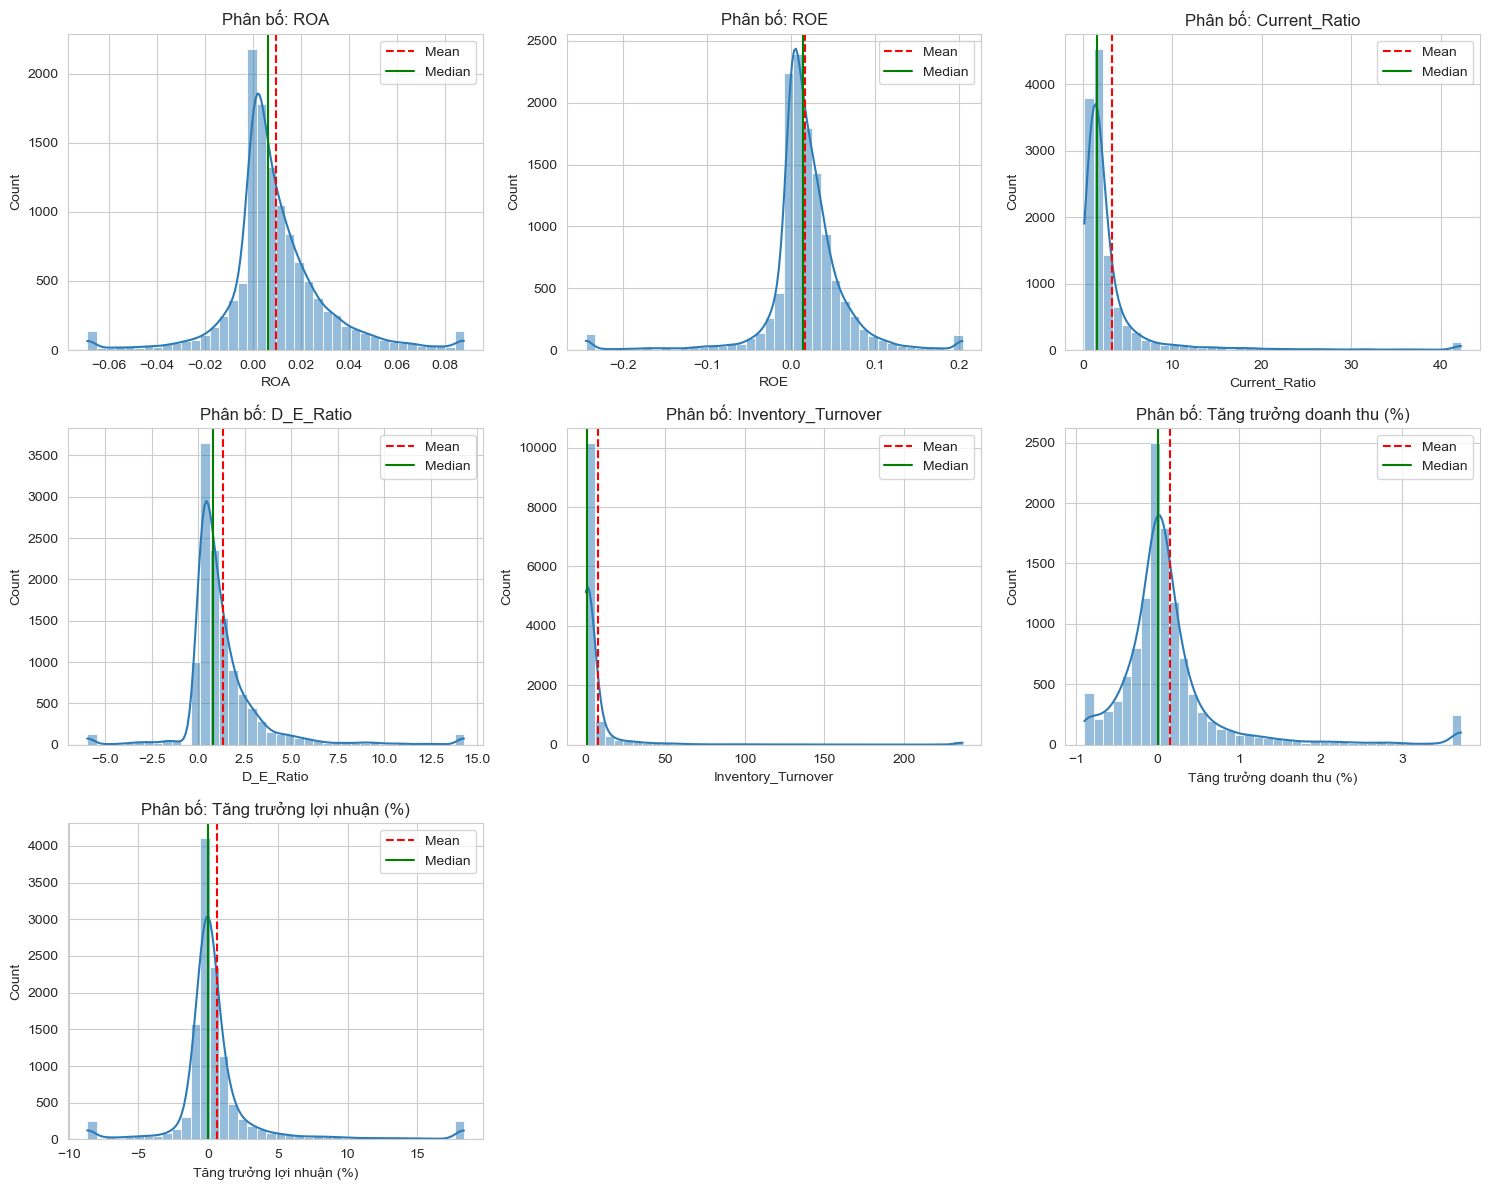

In [9]:
# 1. XÁC ĐỊNH DANH SÁCH CỘT (5 Sức khỏe + 2 Tăng trưởng)
growth_cols = ['Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)']
base_cols = ['ROA', 'ROE', 'Current_Ratio', 'D_E_Ratio', 'Inventory_Turnover']

cols = base_cols + growth_cols   

# 2. XỬ LÝ NHANH CHO CỘT TĂNG TRƯỞNG
for col in growth_cols:
    # Thay thế vô cực và NaN
    df_non_financial_cleaned[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_non_financial_cleaned[col].fillna(0, inplace=True)
    
    # Winsorize riêng cho Tăng trưởng (Cắt 2% đuôi vì biến động mạnh hơn chỉ số tài chính)
    # Dùng clip thủ công cho an toàn
    lower = df_non_financial_cleaned[col].quantile(0.02)
    upper = df_non_financial_cleaned[col].quantile(0.98)
    df_non_financial_cleaned[col] = df_non_financial_cleaned[col].clip(lower=lower, upper=upper)

df_target = df_non_financial_cleaned

# --- 3. SỐ LƯỢNG MẪU & TỈ LỆ DỮ LIỆU THIẾU ---
print(f"Số lượng mẫu: {df_target.shape[0]}")
print(f"Tổng số thuộc tính quan tâm: {len(cols)}")
print("Tỉ lệ dữ liệu thiếu:")
print(df_target[cols].isnull().mean())

# --- 4. CÁC THỐNG KÊ CƠ BẢN ---
stats = df_target[cols].describe().T
stats['median'] = df_target[cols].median()
stats['variance'] = df_target[cols].var()
stats['IQR'] = stats['75%'] - stats['25%']

print("\nBảng Thống kê mô tả (7 Chỉ số cốt lõi):")
display(stats[['count', 'mean', 'median', 'variance', 'min', 'max', 'IQR']])

# --- 5. PHÂN BỐ DỮ LIỆU ---
num_plots = len(cols)
num_cols = 3 
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df_target[col], kde=True, ax=axes[i], bins=40, color='#2c7bb6')
    axes[i].set_title(f'Phân bố: {col}')
    axes[i].axvline(df_target[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df_target[col].median(), color='green', linestyle='-', label='Median')
    axes[i].legend()

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Phân tích nhanh về kết quả thống kê mô tả

### 1. Về Chất lượng và Độ phủ Dữ liệu (Data Completeness)
* **Trạng thái:** Tỉ lệ dữ liệu thiếu (Missing Rate) là **0%** trên toàn bộ 7 thuộc tính quan trọng.
* **Đánh giá:** Bộ dữ liệu hiện tại đạt độ hoàn thiện kỹ thuật tuyệt đối. Mọi bản ghi (12.112 mẫu) đều có đầy đủ giá trị số học để tính toán, không còn bất kỳ giá trị `NaN` nào gây lỗi cho mô hình học máy.
* **Ý nghĩa:** Việc không có dữ liệu thiếu đồng nghĩa với việc mô hình sẽ xử lý được toàn bộ các trường hợp, bao gồm cả những công ty hoạt động bình thường và những công ty có chỉ số bằng 0 (ngừng hoạt động/không có số liệu).

### 2. Về Cấu trúc Tài chính (Financial Structure)
* **Thanh khoản (Current Ratio):**
    * **Median (1.57):** Doanh nghiệp điển hình có tài sản ngắn hạn gấp 1.57 lần nợ ngắn hạn. Đây là mức thanh khoản **an toàn và lành mạnh**.
    * **Mean (3.24) > Median:** Có sự chênh lệch lớn, cho thấy tồn tại một nhóm doanh nghiệp "thừa tiền" hoặc quản trị vốn lưu động chưa tối ưu (tích trữ quá nhiều tiền mặt/tài sản ngắn hạn), kéo mức trung bình lên cao.
* **Đòn bẩy (D/E Ratio):**
    * **Median (0.81):** Phần lớn doanh nghiệp (trên 50%) sử dụng nợ vay ít hơn Vốn chủ sở hữu (D/E < 1). Cấu trúc vốn thiên về an toàn.
    * **Phân phối:** Biểu đồ D/E có đuôi dài về bên phải, cho thấy rủi ro tài chính chủ yếu tập trung vào một nhóm nhỏ các doanh nghiệp sử dụng đòn bẩy rất cao (Max ~14 lần), trong khi đa số thị trường khá thận trọng.

### 3. Về Hiệu suất Sinh lời (Profitability)
* **Biên lợi nhuận thấp:**
    * **Median ROA (~0.61%)** và **Median ROE (~1.4%):** Hiệu suất sinh lời của doanh nghiệp trung vị là rất thấp. Điều này cho thấy sự cạnh tranh khốc liệt hoặc khó khăn chung của nền kinh tế, khi mà phần lớn doanh nghiệp chỉ tạo ra mức lợi nhuận khiêm tốn trên tài sản/vốn.
* **Tập trung quanh số 0:** Biểu đồ ROA/ROE có hình chuông rất nhọn (Kurtosis cao) tập trung quanh mốc 0. Nghĩa là đa số doanh nghiệp chỉ quanh quẩn ở mức hòa vốn hoặc lãi nhẹ. Những doanh nghiệp có ROE > 15-20% là những ngoại lệ xuất sắc ("hàng hiếm") trong tập dữ liệu này.

### 4. Về Hoạt động (Inventory Turnover)
* **Hiện tượng: Biến thiên mạnh & Phân phối lệch phải (High Variance & Right Skewness).**
    * **Phương sai (Variance):** Đạt **847.9** . Điều này khẳng định có sự phân hóa rất lớn giữa các doanh nghiệp.
    * **Lệch phải:** Giá trị trung bình (**Mean = 7.76**) lớn hơn nhiều so với trung vị (**Median = 1.00**).
* **Phân tích Nguyên nhân:**
    * **Hiệu ứng ngành nghề:** Sự chênh lệch giữa Mean và Median phản ánh đúng cấu trúc nền kinh tế. Nhóm có Vòng quay = 0 hoặc thấp (gần Median) thường là các công ty Dịch vụ, Bất động sản, Holdings (ít hàng tồn kho). Ngược lại, nhóm kéo số trung bình lên cao (Max ~236) là các doanh nghiệp Bán lẻ/Sản xuất có tốc độ luân chuyển hàng hóa nhanh.


## 2. Phân tích phân bố nhãn

Phân bố Nhóm Ngành:


,Số lượng (Sample Count),Tỉ lệ (%)
Phi Tài chính (0),12112,97.4338
Tài chính (1),319,2.5662



Phân bố Nhãn Hiệu suất (Proxy: Có Lãi vs. Thua Lỗ) trên tập Phi Tài chính:


,Số lượng (Sample Count),Tỉ lệ (%)
Is_Profitable,,
Có Lãi (1),9322,76.9650
Thua Lỗ (0),2790,23.0350


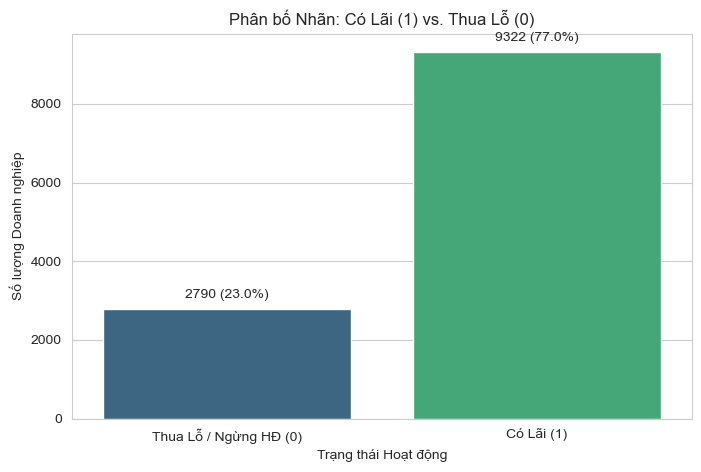

In [10]:
# --- 1. KIỂM TRA MẤT CÂN BẰNG CẤU TRÚC (TÀI CHÍNH VS. PHI TÀI CHÍNH) ---
print("Phân bố Nhóm Ngành:")

struct_counts = df_combined['is_financial'].value_counts()
struct_pct = df_combined['is_financial'].value_counts(normalize=True) * 100

struct_df = pd.DataFrame({
    'Số lượng (Sample Count)': struct_counts, 
    'Tỉ lệ (%)': struct_pct
})
struct_df.index = ['Phi Tài chính (0)', 'Tài chính (1)'] if struct_df.index[0] == 0 else ['Tài chính (1)', 'Phi Tài chính (0)']
display(struct_df)

# --- 2. KIỂM TRA MẤT CÂN BẰNG HIỆU SUẤT (CÓ LÃI VS. THUA LỖ) ---
# Mục đích: Kiểm tra xem tập dữ liệu Phi tài chính có bị lệch về nhóm "Lãi" không
print("\nPhân bố Nhãn Hiệu suất (Proxy: Có Lãi vs. Thua Lỗ) trên tập Phi Tài chính:")

proxy_col = 'Is_Profitable'
df_non_financial_cleaned[proxy_col] = (df_non_financial_cleaned['ROA'] > 0).astype(int)

# Tính toán
perf_counts = df_non_financial_cleaned[proxy_col].value_counts()
perf_pct = df_non_financial_cleaned[proxy_col].value_counts(normalize=True) * 100

perf_df = pd.DataFrame({
    'Số lượng (Sample Count)': perf_counts, 
    'Tỉ lệ (%)': perf_pct
})
perf_df.index = perf_df.index.map({1: 'Có Lãi (1)', 0: 'Thua Lỗ (0)'})
display(perf_df)

# Vẽ biểu đồ trực quan
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=proxy_col, data=df_non_financial_cleaned, palette='viridis')
plt.title('Phân bố Nhãn: Có Lãi (1) vs. Thua Lỗ (0)')
plt.xlabel('Trạng thái Hoạt động')
plt.ylabel('Số lượng Doanh nghiệp')
plt.xticks([0, 1], ['Thua Lỗ / Ngừng HĐ (0)', 'Có Lãi (1)'])

# Thêm nhãn số lượng lên cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} ({p.get_height()/len(df_non_financial_cleaned)*100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()




### 1. Phân tích Cấu trúc (Tài chính vs Phi Tài chính)

* **Kết luận:** Dữ liệu bị **Mất cân bằng nghiêm trọng (Severe Imbalance)** với tỷ lệ chênh lệch gần **1:38**.
* **Hành động:** Quyết định tách riêng hai tập dữ liệu cần thiết. Nếu gộp chung, mô hình sẽ coi nhóm Tài chính là nhiễu (noise) và bỏ qua hoàn toàn các đặc thù của nhóm này.


### 2. Phân tích Nhãn Hiệu suất (Lãi vs Lỗ)

* **Tỷ lệ nhóm thiểu số (Lỗ):** **23.03%**.
* **Đánh giá:**
    * Với tỷ lệ > 20%, tập dữ liệu này được coi là **Mất cân bằng nhẹ (Mild Imbalance)** hay **Chấp nhận được**.
    * Nó **không bị mất cân bằng nghiêm trọng** (như trường hợp < 10%). Điều này có nghĩa là mô hình sẽ có đủ số lượng mẫu "xấu" (2,790 công ty lỗ) để học được các đặc điểm rủi ro mà không bị thiên vị quá mức cho nhóm lãi.


## 3. Phân tích mối quan hệ giữa các thuộc tính

Ma trận Tương quan (Correlation Heatmap):


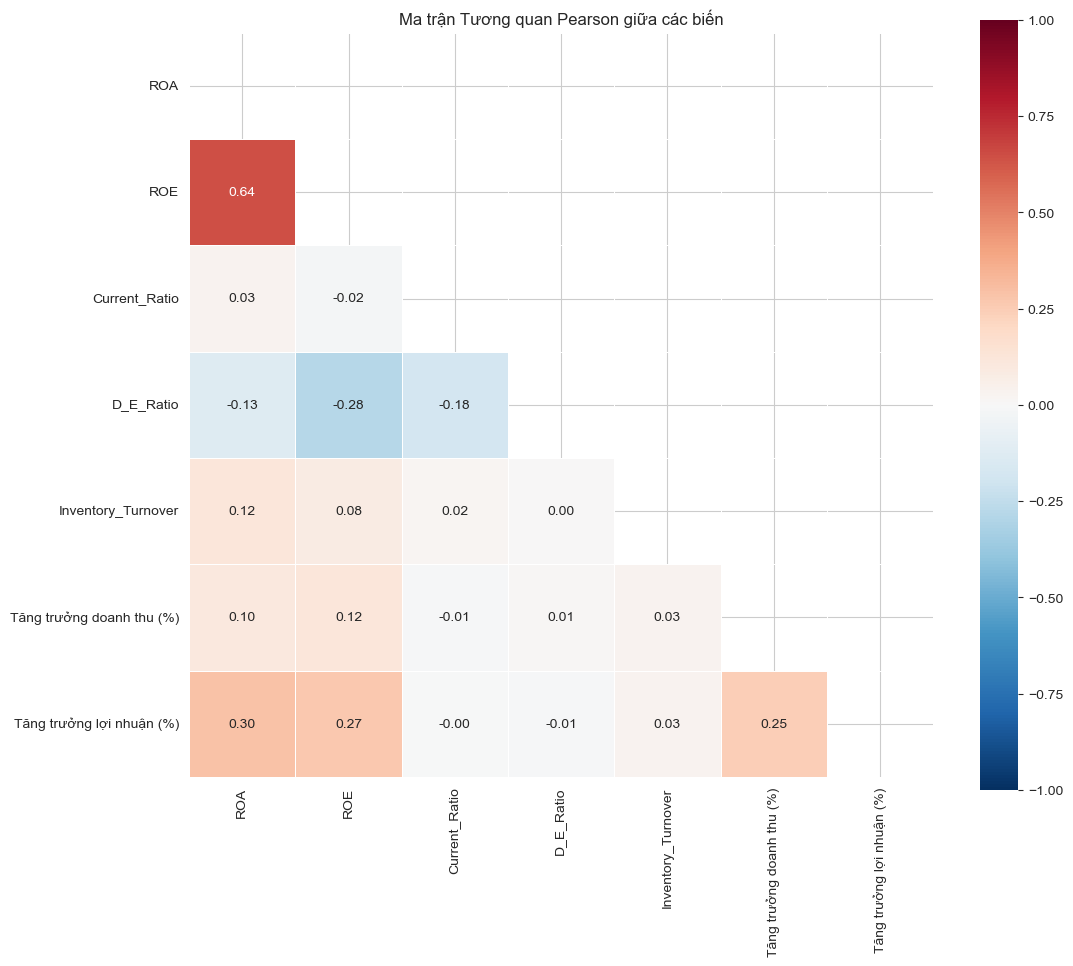

Kiểm tra Đa cộng tuyến (Variance Inflation Factor - VIF):


,Feature,VIF
1,ROE,1.8915
0,ROA,1.7857
6,Tăng trưởng lợi nhuận (%),1.1700
3,D_E_Ratio,1.1451
5,Tăng trưởng doanh thu (%),1.0713
2,Current_Ratio,1.0463
4,Inventory_Turnover,1.0163


In [11]:
# Feature List
base_ratios = ['ROA', 'ROE', 'Current_Ratio', 'D_E_Ratio', 'Inventory_Turnover']
growth_cols = ['Tăng trưởng doanh thu (%)', 'Tăng trưởng lợi nhuận (%)']
actual_features = base_ratios + growth_cols

# KIỂM TRA TƯƠNG QUAN (CORRELATION MATRIX)
print("Ma trận Tương quan (Correlation Heatmap):")

plt.figure(figsize=(12, 10))
corr_matrix = df_non_financial_cleaned[actual_features].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Vẽ Heatmap
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='RdBu_r', 
            center=0,
            vmin=-1, 
            vmax=1,
            linewidths=0.5,
            square=True)

plt.title('Ma trận Tương quan Pearson giữa các biến')
plt.show()

# PHÁT HIỆN ĐA CỘNG TUYẾN (MULTICOLLINEARITY - VIF)
print("Kiểm tra Đa cộng tuyến (Variance Inflation Factor - VIF):")

X_vif = df_non_financial_cleaned[actual_features].copy()
X_vif['intercept'] = 1

# Tính VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = actual_features
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(actual_features))]

display(vif_data.sort_values('VIF', ascending=False))


### 1. Phân tích kết quả VIF & Heatmap
- VIF cho thấy **không có đa cộng tuyến nghiêm trọng**: tất cả VIF < 2.  
- Heatmap (ma trận tương quan Pearson) cho thấy:
  - `ROA` — `ROE` ≈ +0.64: tương quan dương vừa phải, hợp lý vì cả hai đo hiệu quả sinh lời (có chồng chéo thông tin nhưng không quá lớn).
  - `ROA`/`ROE` với `Tăng trưởng lợi nhuận` ≈ +0.27–0.30: growth có thông tin bổ sung nhưng liên quan vừa phải tới profitability.
  - `D_E_Ratio` tương quan âm tới `ROE` (≈ -0.28): mức đòn bẩy cao thường đi kèm ROE thấp hơn trong tập dữ liệu này.
  - `Current_Ratio` gần như không tương quan với ROA/ROE (gần 0): thanh khoản đóng vai trò khác biệt so với lợi nhuận.
  - `Inventory_Turnover` có tương quan rất yếu với các biến còn lại — khả năng ảnh hưởng theo ngành.
- Kết luận: ma trận tương quan và VIF đồng thuận rằng các biến cung cấp thông tin hữu ích và tương đối độc lập; không cần loại bớt do lo ngại đa cộng tuyến.

### 2. Đề xuất cho mô hình
- Giữ lại các biến chính: `ROA`, `ROE`, `Current_Ratio`, `D_E_Ratio`, `Tăng trưởng doanh thu (%)`, `Tăng trưởng lợi nhuận (%)`.
- `Inventory_Turnover`: do tương quan yếu và có vấn đề phương sai/đặc thù ngành, có thể loại hoặc giữ làm feature phụ tuỳ mục tiêu.
- Mô hình đề xuất: Logistic Regression (có thể dùng regularization) và các mô hình tree-based (Random Forest / Gradient Boosting). Cả hai loại đều phù hợp vì đa cộng tuyến thấp.

# III. Tổng kết

Dựa trên kết quả phân tích EDA và kiến thức tài chính, dưới đây là nhận xét về **độ quan trọng và ý nghĩa** của các biến đối với bài toán:

### 1. Nhóm Biến Cốt lõi (Quan trọng Nhất): **ROA & ROE**
Đây là hai biến có ý nghĩa nhất đối với việc phân loại doanh nghiệp (Tốt/Xấu) hoặc dự báo giá cổ phiếu.

* **Lý do:** Chúng đo lường trực tiếp **Hiệu quả hoạt động**. Một công ty có thể doanh thu lớn, nhưng nếu ROA/ROE thấp (hoặc âm), giá cổ phiếu sẽ khó tăng trưởng bền vững.
* **Quan sát từ EDA:** VIF của hai biến này cao nhất (xấp xỉ 1.8 - 1.9), cho thấy chúng chứa nhiều thông tin nhất và có sự tương đồng nhất định.
* **Vai trò trong mô hình:** Sẽ là những đặc trưng (features) đóng góp tỷ trọng lớn nhất để phân biệt nhóm "Có lãi" và "Thua lỗ".

### 2. Nhóm Biến Rủi ro (Quan trọng Nhì): **D/E Ratio & Current Ratio**
Hai biến này đóng vai trò là "Bộ lọc an toàn". Chúng không trực tiếp tạo ra lợi nhuận, nhưng quyết định xem công ty có **tồn tại** được để hưởng lợi nhuận đó hay không.

* **D_E_Ratio (Đòn bẩy):** Giúp mô hình phân biệt giữa một công ty "tăng trưởng thực" và một công ty "tăng trưởng nhờ vay nợ quá đà" (Rủi ro phá sản).
* **Current_Ratio (Thanh khoản):** Giúp phát hiện các công ty có nguy cơ mất khả năng thanh toán ngắn hạn.
* **Vai trò trong mô hình:** Giúp loại bỏ các trường hợp "dương tính giả" (False Positives) - tức là những công ty nhìn có vẻ lãi cao nhưng rủi ro vỡ nợ rất lớn.

### 3. Nhóm Biến Tiềm năng (Biến động cao): **Tăng trưởng Doanh thu & Lợi nhuận**
Đây là nhóm biến "khó học" nhất nhưng lại mang lại giá trị dự báo cao nhất cho bài toán đầu tư (Stock Prediction).

* **Lý do:** Giá cổ phiếu thường phản ánh kỳ vọng tương lai (`Growth`) hơn là hiện tại.
* **Quan sát từ EDA:** Dữ liệu tăng trưởng thường có độ lệch chuẩn lớn. Tuy nhiên, VIF của chúng rất thấp (1.07 và 1.17), nghĩa là chúng cung cấp thông tin hoàn toàn mới lạ, không bị trùng lặp với ROA/ROE.
* **Vai trò trong mô hình:** Là yếu tố "X-Factor" để mô hình tìm ra các siêu cổ phiếu (Super Stocks) thay vì chỉ chọn các công ty an toàn nhưng già cỗi.

### 4. Inventory_Turnover
* **Khuyến nghị:** Giữ `Inventory_Turnover` làm feature (có thể là feature phụ). Vì phân phối thường lệch phải và có khác biệt theo ngành, áp dụng:
  - log-transform hoặc winsorize,
  - chuẩn hóa theo ngành (per-industry z-score) hoặc thêm dummy ngành,
  - kiểm tra feature importance (ablation / permutation) để quyết định giữ/loại chính xác.
* **Lưu ý:** Nếu sau ablation biến thực sự không đóng góp, mới cân nhắc loại bỏ.
